# Вариант №4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency


PATH_TO_FILE = "student_depression_dataset.csv"

df = pd.read_csv(PATH_TO_FILE)

Бинаризируем столбец "Sleep Duration", которую будем использовать для предсказания

In [ ]:
df['Academic Pressure_level'] = df['Academic Pressure'].apply(
    lambda x: 'high' if x > df['Academic Pressure'].median() else 'low')

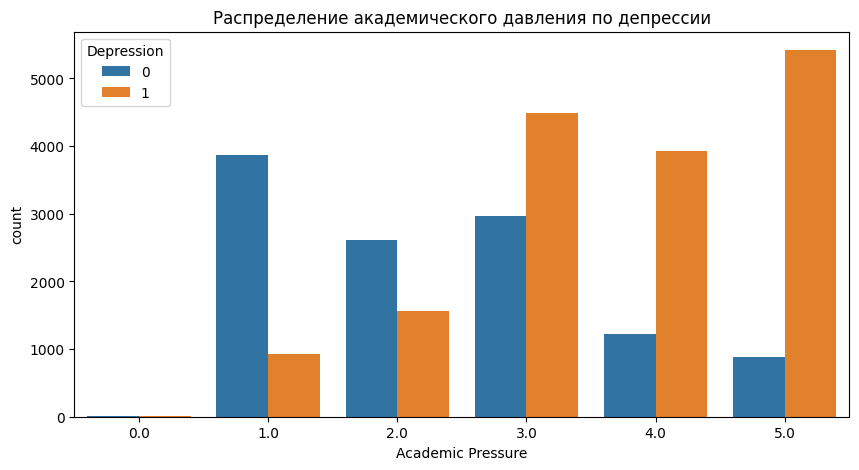

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Academic Pressure', hue='Depression', data=df)
plt.title('Распределение академического давления по депрессии')
plt.show()

Выведем уровень академического давления по депрессии

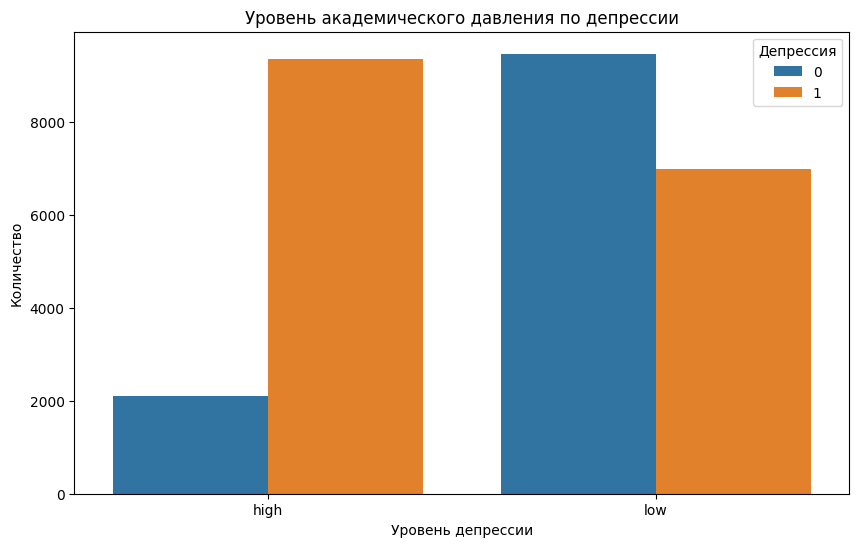

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Academic Pressure_level', hue='Depression')
plt.title('Уровень академического давления по депрессии')
plt.xlabel('Уровень депрессии')
plt.ylabel('Количество')
plt.legend(title='Депрессия')
plt.show()

На графике "Уровень академического давления по разным признакам депрессии" наблюдается четкая зависимость между академической нагрузкой и психическим состоянием студентов.

В группе с низким уровнем академического давления преобладают студенты без признаков депрессии (0), что свидетельствует о том, что умеренная учебная нагрузка благоприятно сказывается на психическом здоровье.

Напротив, в группе с высоким уровнем академического давления значительно больше студентов с диагностированной депрессией (1). Это указывает на прямую взаимосвязь между интенсивной учебной нагрузкой и развитием депрессивных состояний.

Выведем гендер по разным признакам стресса

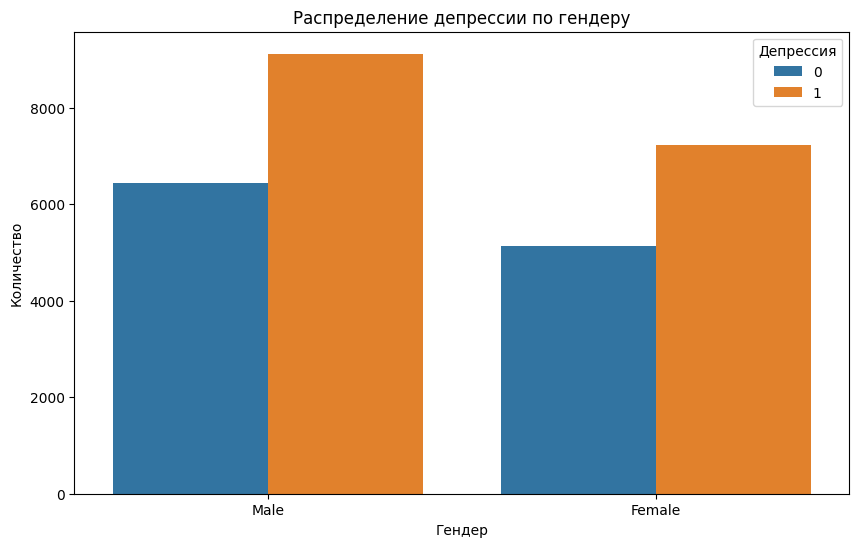

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Распределение депрессии по гендеру')
plt.xlabel('Гендер')
plt.ylabel('Количество')
plt.legend(title='Депрессия')
plt.show()

Распределение по полу и депрессии показывает, что мужчины имеют несколько более высокую склонность к депрессии по сравнению с женщинами.

Проверим зависимости

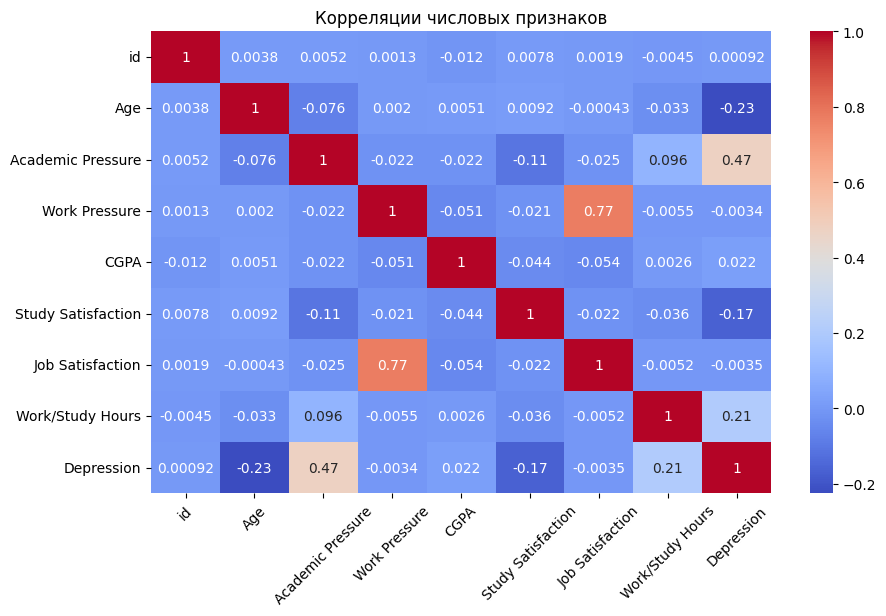

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

Проведенный анализ выявил неоднородное влияние различных факторов депрессии. Некоторые переменные демонстрируют статистически незначимую связь с психическим состоянием. В частности, рабочее давление, удовлетворенность работой и академическая успеваемость (CGPA) показывают корреляции, близкие к нулевым значениям, что указывает на отсутствие их существенного влияния на развитие депрессивных симптомов.

Напротив, академическое давление считается как значимый фактор риска. Обнаружена четкая положительная зависимость: чем выше уровень учебной нагрузки и требований, тем более выраженными оказываются проявления депрессии у студентов.

Возрастная динамика демонстрирует слабую отрицательную корреляцию (-0.23). Это свидетельствует о том, что с увеличением возраста происходит постепенное снижение подверженности депрессивным состояниям, хотя данный защитный эффект выражен относительно умеренно.

Удовлетворенность учебным процессом также выступает в качестве протективного фактора. Отрицательная корреляция (-0.17) указывает на то, что более высокий уровень удовлетворенности образовательной деятельностью ассоциируется с лучшими показателями психического благополучия.

Что касается учебной нагрузки, здесь наблюдается отрицательная корреляция (-0.21) с психическим здоровьем. Увеличение количества часов, посвящаемых учебе и работе, потенциально может способствовать росту уровня стресса и психологического напряжения, что в конечном итоге негативно сказывается на общем психическом состоянии студентов.

Отберём лучшие признаки

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X_processed = df[best_features].copy()

le = LabelEncoder()
X_processed['Gender'] = le.fit_transform(X_processed['Gender'])

X_scaled = StandardScaler().fit_transform(X_processed)
pd.DataFrame(X_scaled, columns=X_processed.columns).head(n=3)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Gender
0,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-1.121213,0.891416
1,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-1.121213,-1.121811
2,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,0.497095,0.891416


Разделим выборку на тестовую и обучающую

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Создадим модель логистической регрессии и обучим её

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

label_encoders = {}
for col in X_train_encoded.columns:
    if X_train_encoded[col].dtype == 'object':
        le = LabelEncoder()
        X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
        X_test_encoded[col] = le.transform(X_test_encoded[col])
        label_encoders[col] = le

if y_train.dtype == 'object':
    le_y = LabelEncoder()
    y_train_encoded = le_y.fit_transform(y_train)
    y_test_encoded = le_y.transform(y_test)
else:
    y_train_encoded = y_train
    y_test_encoded = y_test

model = LogisticRegression(random_state=42)
model.fit(X_train_encoded, y_train_encoded)

y_train_pred = model.predict(X_train_encoded)
y_train_proba = model.predict_proba(X_train_encoded)

y_pred = model.predict(X_test_encoded)
y_proba = model.predict_proba(X_test_encoded)

Выведем метрики

In [ ]:
def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # ROC-AUC (если переданы вероятности)
    roc_auc = None
    if y_proba is not None:
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    metrics_dict = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc
    }

    print("=== Метрики классификации ===")
    for metric, value in metrics_dict.items():
        if value is not None:
            print(f"{metric}: {value:.4f}")

    return metrics_dict

In [ ]:
metrics = evaluate_classification(y_train, y_train_pred, y_train_proba)

=== Метрики классификации ===
accuracy: 0.7567
precision: 0.7550
recall: 0.7567
f1: 0.7551
roc_auc: 0.8229


In [ ]:
metrics = evaluate_classification(y_test, y_pred, y_proba)

=== Метрики классификации ===
accuracy: 0.7563
precision: 0.7545
recall: 0.7563
f1: 0.7545
roc_auc: 0.8229


In [ ]:
print("\n=== Коэффициенты модели ===")
importance = pd.DataFrame({
    'Feature': X_train_encoded.columns,
    'Coefficient': model.coef_[0],
})

print(importance)


=== Коэффициенты модели ===
              Feature  Coefficient
0                 Age    -0.107590
1   Academic Pressure     0.837697
2       Work Pressure    -0.000530
3                CGPA     0.054610
4  Study Satisfaction    -0.224492
5    Job Satisfaction    -0.002269
6    Work/Study Hours     0.116257
7              Gender     0.035967
